In [2]:
# Load data and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

directory_path = os.getcwd() + "\\Data\\sorting_event_volumes_2023.csv"

df = pd.read_csv(directory_path)

In [4]:
# Data cleaning
print("Number of rows is: " + str(df.shape[0]))

df = df.loc[df["event_type"] == "LAJ", :]
df.drop(['event_location', 'input_belt', 'position'], axis=1, inplace = True)
df.dropna(inplace = True)
df['output_belt'] = df['output_belt'].astype(int)
df['scanning_date'] = pd.to_datetime(df['scanning_date'])

print("Number of rows cleaned data is: " + str(df.shape[0]))

Number of rows is: 8949721


C:\Users\krist\AppData\Local\Temp\ipykernel_41796\1344708621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['event_location', 'input_belt', 'position'], axis=1, inplace = True)
C:\Users\krist\AppData\Local\Temp\ipykernel_41796\1344708621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)
C:\Users\krist\AppData\Local\Temp\ipykernel_41796\1344708621.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Number of rows cleaned data is: 7450939


C:\Users\krist\AppData\Local\Temp\ipykernel_41796\1344708621.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scanning_date'] = pd.to_datetime(df['scanning_date'])


In [5]:
# Data preparation
df['day'] = df['scanning_date'].dt.day
df['month'] = df['scanning_date'].dt.month
df['weekday'] = df['scanning_date'].dt.day_of_week + 1
df['week'] = df['scanning_date'].dt.day_of_year // 7 + 1

sorting_center_names = df["sorting_center_name"].unique()
df["sorting_center_name"].value_counts()

C:\Users\krist\AppData\Local\Temp\ipykernel_41796\3026268839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['scanning_date'].dt.day
C:\Users\krist\AppData\Local\Temp\ipykernel_41796\3026268839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['scanning_date'].dt.month
C:\Users\krist\AppData\Local\Temp\ipykernel_41796\3026268839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

VANTAA       4888466
TAMPERE      1154436
KUOPIO        578274
LIETO         443087
OULU          354047
SEINÄJOKI      32629
Name: sorting_center_name, dtype: int64

In [6]:
#missing dates: 9 april, 24 june, 24 dec, 25 dec, 31 dec

In [7]:
#import plotly.express as px
#fig_weekday = px.histogram(df.weekday,x='weekday')
#fig_weekday.update_layout(bargap=0.2)
#fig_weekday.show()

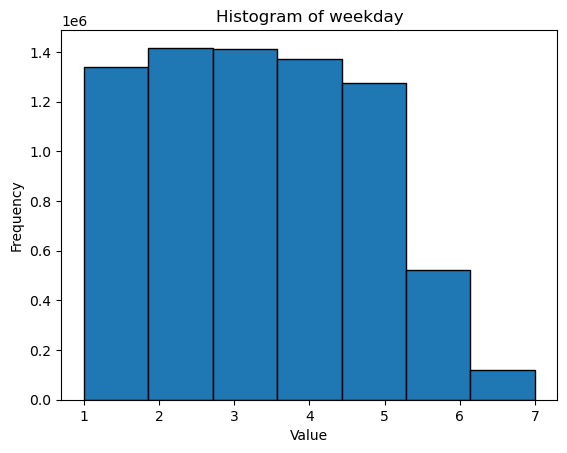

In [9]:
# Create the histogram
plt.hist(df['weekday'], bins=7, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of weekday')

# Show the plot
plt.show()